In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
# lambda_ = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_final["lambda"].data.copy()
# phi = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_final["phi"].data.copy()
# zs = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_final["zs"].data.copy()

# def compute_present_temps(zs, phi, lambda_, temp_present_offset=-1.0):
#     """
#     Vectorized translation of the Fortran snippet.
#     Inputs are in radians for phi (latitude) and lambda_ (longitude).
#     Returns temp_ma_present, temp_mj_present with the same shape as inputs.
#     """
#     # constants
#     rad2deg = 180.0 / np.pi

#     # Offsets
#     theta_ma_offset = temp_present_offset
#     theta_mj_offset = temp_present_offset

#     # Mean-annual parameters
#     theta_ma = 41.83 + theta_ma_offset
#     gamma_ma = -6.309e-3
#     c_ma     = -0.7189
#     kappa_ma = -0.0672

#     # Mean-July parameters
#     theta_mj = 14.70 + theta_mj_offset
#     gamma_mj = -5.426e-3
#     c_mj     = -0.1585
#     kappa_mj = -0.0518

#     # Map longitude to (-π, π] like Fortran: modulo(lambda+π, 2π) - π
#     lon_term = np.mod(lambda_ + np.pi, 2*np.pi) - np.pi

#     # Present-day mean-annual air temperature
#     temp_ma_present = (
#         theta_ma
#         + gamma_ma * zs
#         + c_ma * phi * rad2deg
#         + kappa_ma * lon_term * rad2deg
#     )

#     # Present-day mean-July (mid-summer) air temperature
#     temp_mj_present = (
#         theta_mj
#         + gamma_mj * zs
#         + c_mj * phi * rad2deg
#         + kappa_mj * lon_term * rad2deg
#     )

#     return temp_ma_present, temp_mj_present

# temp_ma_present, temp_mj_present = compute_present_temps(zs, phi, lambda_, temp_present_offset=-1.0)

# plt.contourf(temp_ma_present)
# plt.colorbar()

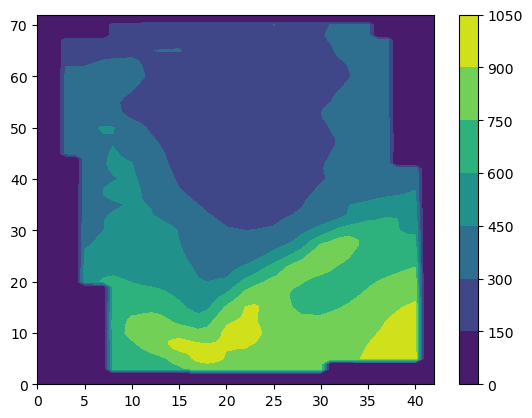

In [3]:
precip = xr.open_dataset("/home/shreyas/update_to_develop_sicopolis/sicopolis/sico_in/grl/grl_rembo_40_precip.nc")
plt.contourf(precip["precip_ma_present"].data)
plt.colorbar()

In [4]:
ds_grl40_bm5_paleo17a_CT4_BH0_m21ka_pkp_init = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka0005.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka0006.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_final = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')
ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups_develop/sico_out/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka_ser.nc')

ds_adj_SVC_nudged_m21ka = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_sens/src/subroutines/tapenade/ad_io/ad_output_adj_grl40_bm5_paleo17a_nudged_CT4_BH0_SVC_m21ka_pkp.nc')
ds_adj_BM5_m11ka = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_sens/src/subroutines/tapenade/ad_io/ad_output_adj_grl40_bm5_paleo17a_CT4_BH0_BM5_m11ka_pkp.nc')
ds_adj_AC_m11ka = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_sens/src/subroutines/tapenade/ad_io/ad_output_adj_grl40_bm5_paleo17a_CT4_BH0_AC_m11ka_pkp.nc')
ds_adj_AC_BM5_m11ka = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_sens/src/subroutines/tapenade/ad_io/ad_output_adj_grl40_bm5_paleo17a_CT4_BH0_AC_BM5_m11ka_pkp.nc')

In [18]:
def non_dim_sensitivities(ds_init, ds_output_adj, bool_nudged):
    non_dim_grads = {}
    fc = ds_output_adj['fc'].data
    print(fc)

    ### FUTURE WORK, SINCE I MISSED TUNING THIS IN PHASE I
    # non_dim_grads['c_dis_dab'] = np.abs(np.sum(ds_output_adj['xx_c_dis_dab'].data)) * 15659.0 / fc[0] 

    ### ds_init['c_slide'].data/10.0 used here to non-dimensionalize, assuming p = 3, q = 2
    non_dim_grads['c_slide_initb'] = np.sum(np.abs(ds_output_adj['xx_c_slide_initb'].data * ds_init['c_slide'].data/10.0)) / fc[0]

    non_dim_grads['q_geob'] = np.sum(np.abs(ds_output_adj['xx_q_geob'].data * ds_init['q_geo'].data)) / fc[0]
    non_dim_grads['enh_fact_da_dummy2d_scalar'] = np.abs(np.sum(ds_output_adj['xx_enh_fact_da_dummy2d_scalarb'].data)) * 3.0 / fc[0]
    non_dim_grads['enh_intg_da_dummy2d_scalar'] = np.abs(np.sum(ds_output_adj['xx_enh_intg_da_dummy2d_scalarb'].data)) * 1.0 / fc[0]
    non_dim_grads['n_glen_da_dummy2d_scalar'] = np.abs(np.sum(ds_output_adj['xx_n_glen_da_dummy2d_scalarb'].data)) * 1.0 / fc[0]
    non_dim_grads['p_weert'] = np.abs(np.sum(ds_output_adj['xx_p_weertb'].data)) * 1.0 / fc[0] # p==3, but expected change should be 2, this is not a bug
    non_dim_grads['q_weert'] = np.abs(np.sum(ds_output_adj['xx_q_weertb'].data)) * 1.0 / fc[0]
    if not bool_nudged:
        # non_dim_grads['zsb'] = np.sum(np.abs(ds_output_adj['xx_zsb'].data)) * 100.0 / fc[0]
        # non_dim_grads['zlb'] = np.sum(np.abs(ds_output_adj['xx_zlb'].data)) * 100.0 / fc[0]
        non_dim_grads['Hb'] = np.sum(np.abs(ds_output_adj['xx_Hb'].data * 1000.0)) / fc[0]
        # non_dim_grads['zbb'] = np.sum(np.abs(ds_output_adj['xx_zbb'].data)) * 100.0 / fc[0]
        non_dim_grads['temp_cb'] = np.sum(np.abs(ds_output_adj['xx_temp_cb'].data * 5)) / fc[0]
        non_dim_grads['temp_rb'] = np.sum(np.abs(ds_output_adj['xx_temp_rb'].data * 5)) / fc[0]
        non_dim_grads['omega_cb'] = np.sum(np.abs(ds_output_adj['xx_omega_cb'].data * 0.01)) / fc[0]
        non_dim_grads['age_cb'] = np.sum(np.abs(ds_output_adj['xx_age_cb'].data) * ds_init['age_c'].data) / fc[0] # * 3.156e+7 # year2sec
        non_dim_grads['delta_tdab'] = np.sum(np.abs(ds_output_adj['xx_delta_tdab'].data[:-1])) * 5.0 / fc[0]
        non_dim_grads['gamma_sb'] = np.sum(np.abs(ds_output_adj['xx_gamma_sb'].data)) * 0.070458 / fc[0]
        non_dim_grads['s_statb'] = np.abs(np.sum(ds_output_adj['xx_s_statb'].data)) * 5.0 / fc[0]
        non_dim_grads['beta1b'] = np.abs(np.sum(ds_output_adj['xx_beta1b'].data)) * 2.73 / fc[0]
        non_dim_grads['beta2b'] = np.abs(np.sum(ds_output_adj['xx_beta2b'].data)) * 7.28 / fc[0]
        non_dim_grads['Pmaxb'] = np.abs(np.sum(ds_output_adj['xx_Pmaxb'].data)) * 0.6 / fc[0]
        non_dim_grads['mub'] = np.abs(np.sum(ds_output_adj['xx_mub'].data)) * 9.7155 / fc[0]

    
    # Sum of all calculated non-dimensional sensitivities
    total_sum = sum(non_dim_grads.values())
    
    # Normalize each field to percentage and round to two decimal places
    non_dim_grads_percentage = {key: np.round((value / total_sum) * 100, 2) for key, value in non_dim_grads.items()}
    
    return non_dim_grads_percentage

In [19]:
temp = xr.open_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_2/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
10**temp["xx_c_dis_da"].data

array([16915.8627614])

In [20]:
non_dim_sensitivities(ds_grl40_bm5_paleo17a_CT4_BH0_m21ka_pkp_init, ds_adj_SVC_nudged_m21ka, True)

[11602.29494573]


{'c_slide_initb': 45.52,
 'q_geob': 7.45,
 'enh_fact_da_dummy2d_scalar': 6.15,
 'enh_intg_da_dummy2d_scalar': 0.22,
 'n_glen_da_dummy2d_scalar': 2.97,
 'p_weert': 11.48,
 'q_weert': 26.2}

In [21]:
non_dim_sensitivities(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init, ds_adj_AC_BM5_m11ka, False)

[18027.74366304]


{'c_slide_initb': 4.87,
 'q_geob': 0.12,
 'enh_fact_da_dummy2d_scalar': 1.69,
 'enh_intg_da_dummy2d_scalar': 0.57,
 'n_glen_da_dummy2d_scalar': 0.61,
 'p_weert': 1.04,
 'q_weert': 1.4,
 'Hb': 2.9,
 'temp_cb': 1.68,
 'temp_rb': 2.04,
 'omega_cb': 0.57,
 'age_cb': 17.27,
 'delta_tdab': 27.88,
 'gamma_sb': 1.36,
 's_statb': 18.49,
 'beta1b': 3.3,
 'beta2b': 8.95,
 'Pmaxb': 5.19,
 'mub': 0.07}

In [9]:
non_dim_sensitivities(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init, ds_adj_BM5_m11ka, False)

[4780.79563039]


{'c_slide_initb': 5.54,
 'q_geob': 0.11,
 'enh_fact_da_dummy2d_scalar': 1.84,
 'enh_intg_da_dummy2d_scalar': 0.08,
 'n_glen_da_dummy2d_scalar': 0.41,
 'p_weert': 3.16,
 'q_weert': 4.44,
 'Hb': 1.66,
 'temp_cb': 1.36,
 'temp_rb': 1.55,
 'omega_cb': 0.46,
 'age_cb': 0.0,
 'delta_tdab': 19.11,
 'gamma_sb': 1.39,
 's_statb': 29.64,
 'beta1b': 5.28,
 'beta2b': 15.41,
 'Pmaxb': 8.48,
 'mub': 0.09}

In [10]:
non_dim_sensitivities(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init, ds_adj_AC_m11ka, False)

[13254.0710004]


{'c_slide_initb': 5.35,
 'q_geob': 0.2,
 'enh_fact_da_dummy2d_scalar': 1.63,
 'enh_intg_da_dummy2d_scalar': 1.89,
 'n_glen_da_dummy2d_scalar': 1.08,
 'p_weert': 0.04,
 'q_weert': 0.1,
 'Hb': 5.78,
 'temp_cb': 2.75,
 'temp_rb': 3.34,
 'omega_cb': 0.93,
 'age_cb': 52.39,
 'delta_tdab': 15.28,
 'gamma_sb': 1.71,
 's_statb': 2.62,
 'beta1b': 0.41,
 'beta2b': 3.42,
 'Pmaxb': 1.01,
 'mub': 0.06}